<a href="https://colab.research.google.com/github/RileyWClarke/MLTSA_RClarke/blob/master/HW5/MLTSA_rclarke_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MLTSA - Riley Clarke - HW5

In [0]:
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd
% matplotlib inline

In [0]:
plt.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

Reading in data via Kaggle API:

In [0]:
!pip install kaggle

In [0]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [4]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [6]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [9]:
!kaggle competitions list -s PLAsTiCC

ref            deadline             category   reward  teamCount  userHasEntered  
-------------  -------------------  --------  -------  ---------  --------------  
PLAsTiCC-2018  2018-12-17 23:59:00  Featured  $25,000       1094            True  


In [10]:
!mkdir plasticc

mkdir: cannot create directory ‘plasticc’: File exists


In [11]:
cd plasticc

/content/gdrive/My Drive/plasticc


In [12]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [13]:
cd data

/content/gdrive/My Drive/plasticc/data


In [14]:
!kaggle competitions download PLAsTiCC-2018

test_set_batch7.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch3.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
training_set_metadata.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch9.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
training_set.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch8.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
data_note.pdf.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch11.csv.zip: Skipping, found 

In [0]:
ls

data_note.pdf.zip          test_set_batch4.csv.zip  test_set_metadata.csv.zip
sample_submission.csv.zip  test_set_batch5.csv.zip  test_set_sample.csv.zip
test_set_batch10.csv.zip   test_set_batch6.csv.zip  training_set.csv
test_set_batch11.csv.zip   test_set_batch7.csv.zip  training_set.csv.zip
test_set_batch1.csv.zip    test_set_batch8.csv.zip  training_set_metadata.csv
test_set_batch2.csv.zip    test_set_batch9.csv.zip
test_set_batch3.csv.zip    test_set.csv.zip


In [0]:
!unzip training_set.csv.zip

Archive:  training_set.csv.zip
replace training_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: training_set.csv        


In [15]:
lcvs = pd.read_csv('training_set.csv')
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [16]:
bands = lcvs["passband"].unique()
print("Passbands (filter) identifiers:", bands)

Passbands (filter) identifiers: [2 1 3 4 5 0]


In [17]:
objects = lcvs["object_id"].unique()
print("There are {} astrophysical simulated objects in my dataset".format(objects.shape[0]))

There are 7848 astrophysical simulated objects in my dataset


In [18]:
metadata = pd.read_csv('training_set_metadata.csv')
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [19]:
metadata.columns

Index(['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target'],
      dtype='object')

In [20]:
print("The metadata dataset contains more information for each time series: (time-series, columns)", metadata.shape)

The metadata dataset contains more information for each time series: (time-series, columns) (7848, 12)


In [107]:
norm_band = Normalize(vmin=bands.min(), vmax=bands.max())

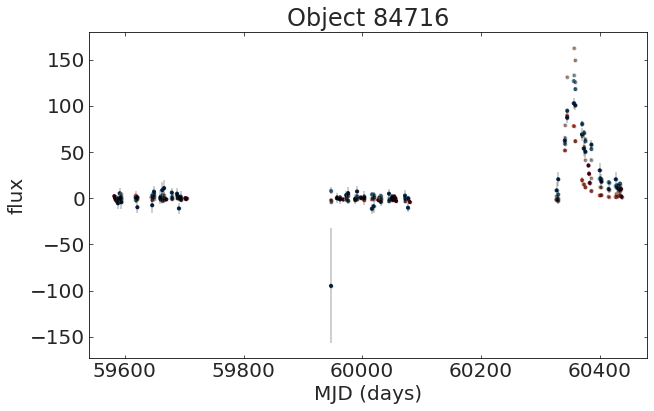

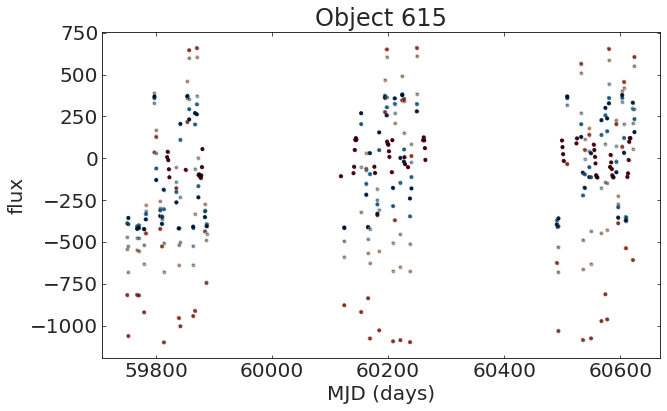

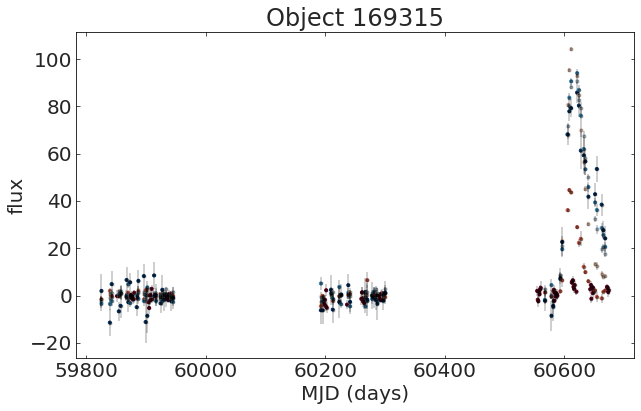

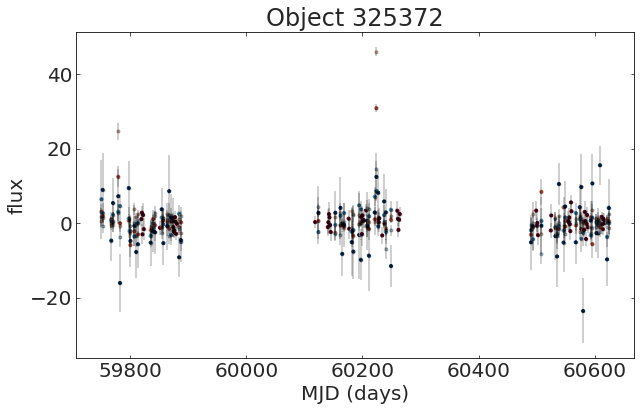

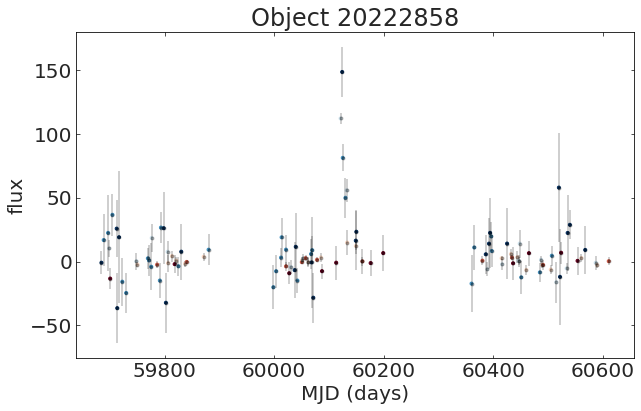

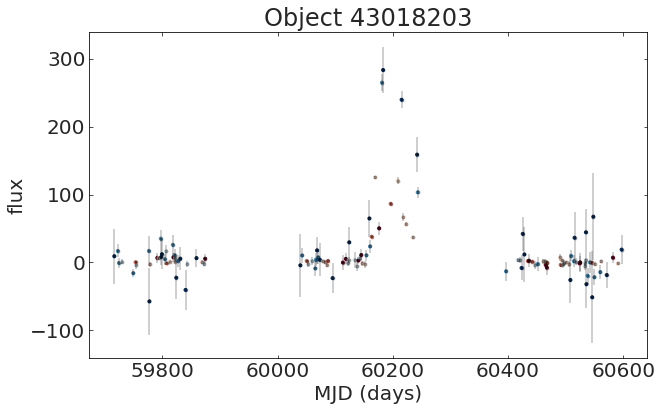

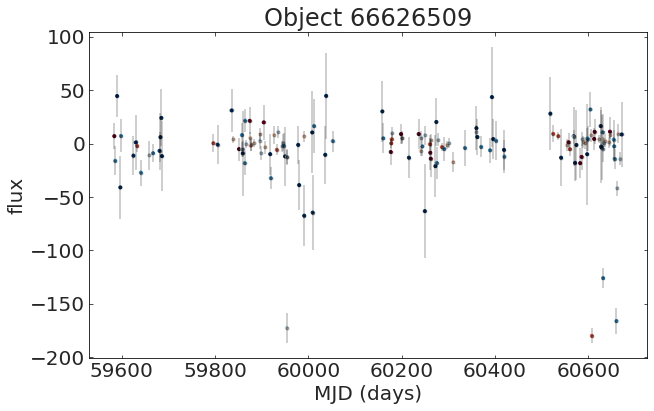

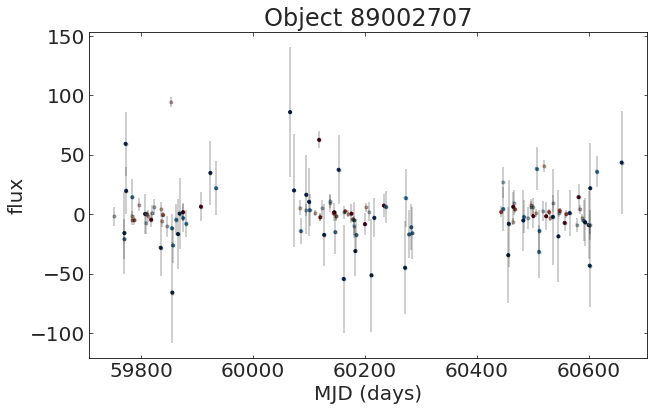

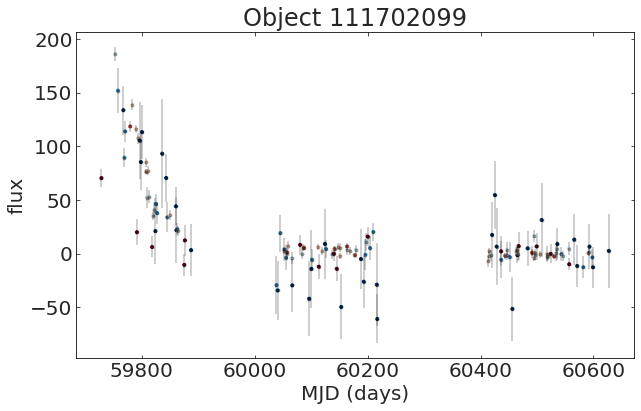

In [128]:
from matplotlib import cm

x = lcvs['mjd'].loc[lcvs['object_id'] == 84716]
y = lcvs['flux'].loc[lcvs['object_id'] == 84716]
yerr = lcvs['flux_err'].loc[lcvs['object_id'] == 84716]
cmap = cm.get_cmap('RdBu')
plt.scatter(x, y, c=lcvs['passband'].loc[lcvs['object_id'] == 84716], cmap=cmap, marker='.')
plt.errorbar(x, y, yerr = yerr, fmt='k.', marker=None, alpha=0.25)
plt.xlabel('MJD (days)')
plt.ylabel('flux')
plt.title('Object 84716')
plt.show()

for id in lcvs['object_id'].unique()[::1000]:
  x = lcvs['mjd'].loc[lcvs['object_id'] == id]
  y = lcvs['flux'].loc[lcvs['object_id'] == id]
  yerr = lcvs['flux_err'].loc[lcvs['object_id'] == id]
  cmap = cm.get_cmap('RdBu')
  plt.scatter(x, y, c=lcvs['passband'].loc[lcvs['object_id'] == id], cmap=cmap, marker='.')
  plt.errorbar(x, y, yerr = yerr, fmt='k.', marker=None, alpha=0.25)
  plt.xlabel('MJD (days)')
  plt.ylabel('flux')
  plt.title('Object '+str(id))
  plt.show()

Figure 1: Flux vs. MJD (modified Julian date) for every 1000th object in the dataset + Object 84716. Each object has observations over ~200 days, with three ~200 day observation periods for each object. The objects were observed in 6 filters, denoted by the coloring of each datapoint. Some objects have notable outlier points with very large uncertainties, particularly objects 84716, 2022858 & 66626509.

## Task 4: Feature Extraction

### Task 4.1

Features to extract: 

From original lightcurve:\
-Mean\
-Standard deviation\
-Skewness\
-Kurtosis\
-Minimum\
-Maximum

The above features will be necessary to conduct any sort of statistical inference on the lightcurves


From standardized lightcurve:\
-Median\
-Line fit parameters\
-Quadratic fit parameters

These features will be necessary to analyze model fitting.

From metadata:\
-hostgal_specz\
-mwebv

hostgal_specz is the spectroscopic redshift of the host galaxy and is important if our science case requires that we study primoridal galaxies at very high redshifts, for example.

mwebv is the extincton coefficient, which is crucial if we need to account for the presence of interstellar/intergalactic dust in the line-of-sight of our targets.



### Task 4.2

In [0]:
means = lcvs.groupby(["object_id", "passband"])[["flux"]].mean()
sds = lcvs.groupby(["object_id", "passband"])[["flux"]].std()
mean_err = lcvs.groupby(["object_id", "passband"])[["flux_err"]].mean()

In [0]:
features = means.rename({"flux": "mean"}, 
                        axis=1).merge(sds.rename({"flux": "std"}, 
                                axis=1), left_index=True, right_index=True)

In [294]:
features

mean           std
object_id passband                           
615       0           -3.254554     83.944735
          1         -385.699911    601.787302
          2         -134.146566    455.121346
          3         -121.103501    335.425053
          4          -55.954592    291.803449
...                         ...           ...
130779836 1          725.169852   1197.557111
          2         2690.360415   6440.422386
          3          755.993902   1443.868085
          4         3489.185336  11006.766106
          5         4151.358875   8687.101173

[47088 rows x 2 columns]

In [0]:
from scipy import stats 
def m2f(x):
    return stats.moment(x, moment = 2)
def m3f(x):
    return stats.moment(x, moment = 3)
m2 = lcvs.groupby(["object_id", "passband"])["flux"].apply(m2f)
m3 = lcvs.groupby(["object_id", "passband"])["flux"].apply(m3f)

In [295]:
features = features.merge(m2.rename('m2'), left_index=True, right_index=True)
features = features.merge(m3.rename('m3'), left_index=True, right_index=True)
features

mean           std            m2            m3
object_id passband                                                       
615       0           -3.254554     83.944735  6.934866e+03  7.266579e+04
          1         -385.699911    601.787302  3.559040e+05  8.593916e+07
          2         -134.146566    455.121346  2.035641e+05  3.040627e+07
          3         -121.103501    335.425053  1.105701e+05  1.049664e+07
          4          -55.954592    291.803449  8.368116e+04  4.717542e+06
...                         ...           ...           ...           ...
130779836 1          725.169852   1197.557111  1.314631e+06  2.360077e+09
          2         2690.360415   6440.422386  3.981988e+07  9.572595e+11
          3          755.993902   1443.868085  1.989993e+06  6.673022e+09
          4         3489.185336  11006.766106  1.164893e+08  5.307167e+12
          5         4151.358875   8687.101173  7.169244e+07  1.380872e+12

[47088 rows x 4 columns]

In [0]:
maxs = lcvs.groupby(["object_id", "passband"])[["flux"]].max()
mins = lcvs.groupby(["object_id", "passband"])[["flux"]].min()

In [297]:
features = features.merge(maxs.rename({"flux": "max"}, 
                                axis=1), left_index=True, right_index=True).merge(mins.rename({"flux": "min"}, 
                                axis=1), left_index=True, right_index=True)
features

mean           std  ...           max          min
object_id passband                             ...                           
615       0           -3.254554     83.944735  ...    125.182808  -116.913223
          1         -385.699911    601.787302  ...    660.626343 -1100.440063
          2         -134.146566    455.121346  ...    611.984558  -681.858887
          3         -121.103501    335.425053  ...    445.737061  -530.644592
          4          -55.954592    291.803449  ...    381.953735  -422.184509
...                         ...           ...  ...           ...          ...
130779836 1          725.169852   1197.557111  ...   3320.936279   -34.273514
          2         2690.360415   6440.422386  ...  31437.089844   -14.478923
          3          755.993902   1443.868085  ...   4995.144043   -41.850040
          4         3489.185336  11006.766106  ...  54982.875000   -72.634567
          5         4151.358875   8687.101173  ...  29058.212891   -86.457382

[47088 rows x 6 columns]

## Task 4.3

In [0]:
lcvs['fluxnormed'] = (lcvs['flux'] - lcvs['flux'].mean()) / lcvs['flux'].std()

In [299]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected,fluxnormed
0,615,59750.4229,2,-544.810303,3.622952,1,-0.154566
1,615,59750.4306,1,-816.434326,5.553370,1,-0.228286
2,615,59750.4383,3,-471.385529,3.801213,1,-0.134638
3,615,59750.4450,4,-388.984985,11.395031,1,-0.112274
4,615,59752.4070,2,-681.858887,4.041204,1,-0.191762


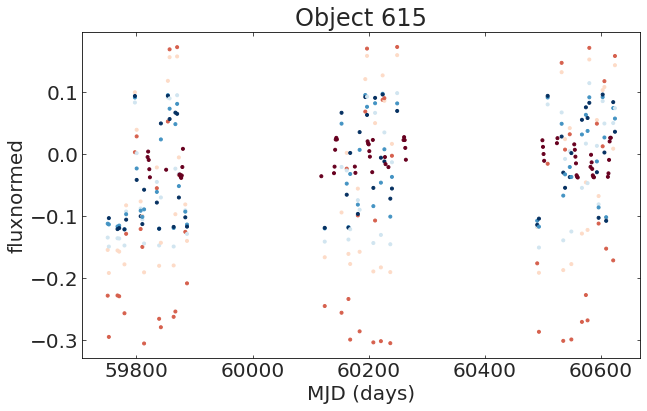

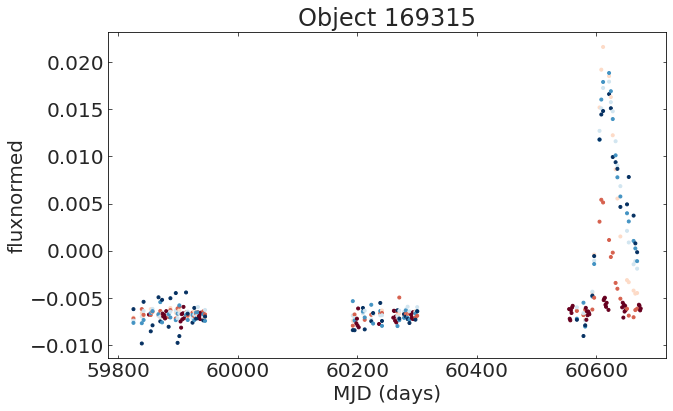

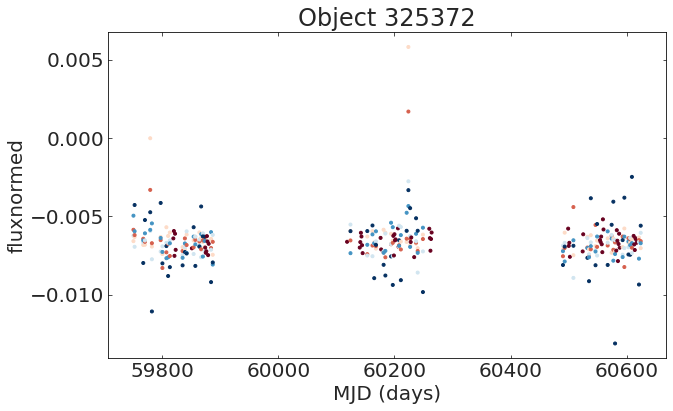

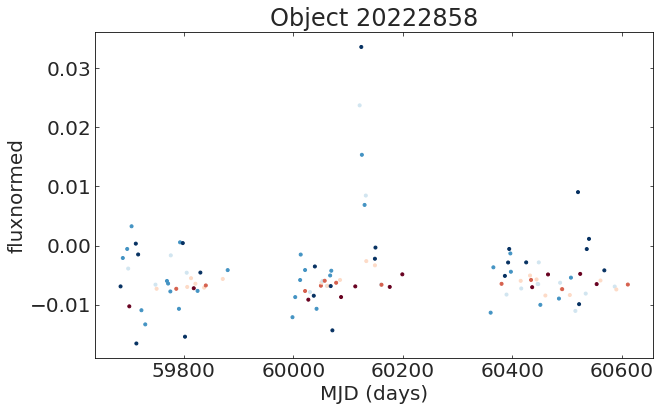

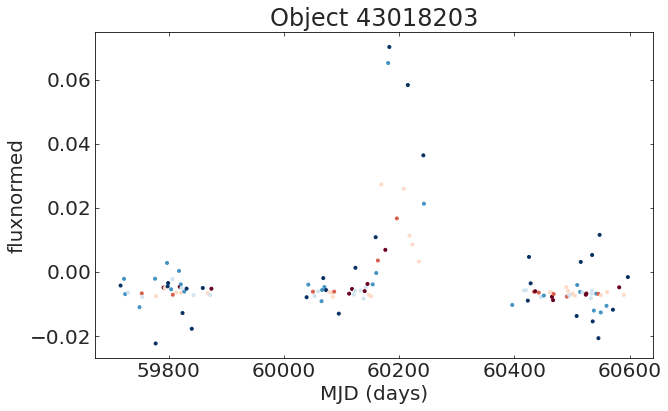

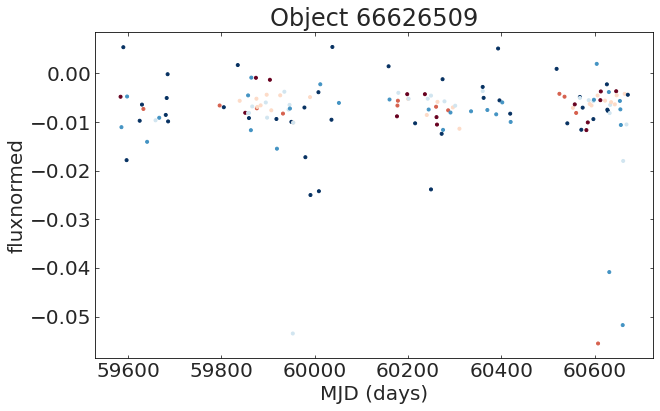

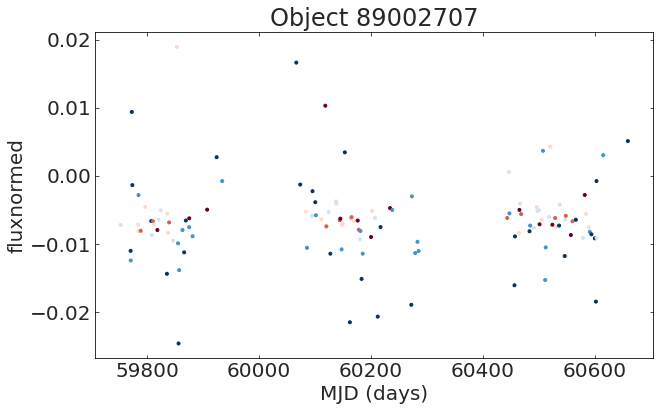

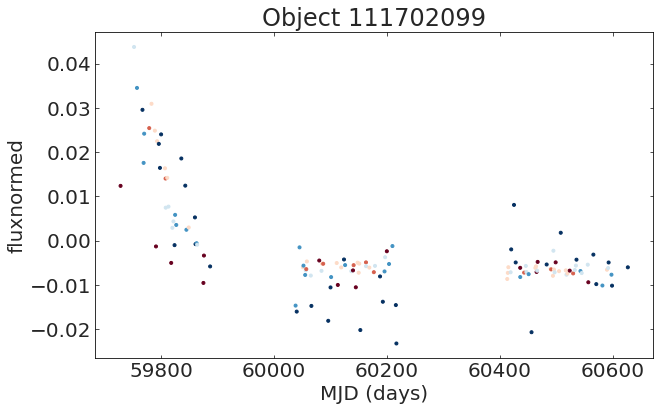

In [144]:
for id in lcvs['object_id'].unique()[::1000]:
  x = lcvs['mjd'].loc[lcvs['object_id'] == id]
  y = lcvs['fluxnormed'].loc[lcvs['object_id'] == id]
  c = lcvs['passband'].loc[lcvs['object_id'] == id]
  cmap = cm.get_cmap('RdBu')
  plt.scatter(x, y, c=lcvs['passband'].loc[lcvs['object_id'] == id], cmap=cmap, marker='.')
  plt.xlabel('MJD (days)')
  plt.ylabel('fluxnormed')
  plt.title('Object '+str(id))
  plt.show()

Figure 2: Standardized Flux for each 100th object in the dataset

In [0]:
maxs_standardized = lcvs.groupby(["object_id", "passband"])["fluxnormed"].max()
mins_standardized = lcvs.groupby(["object_id", "passband"])["fluxnormed"].min()

In [301]:
medians = lcvs.groupby(["object_id", "passband"])[["fluxnormed"]].median()

features = features.merge(medians.rename({"fluxnormed": "median"}, 
                                axis=1), left_index=True, right_index=True)
features

mean           std  ...          min    median
object_id passband                             ...                       
615       0           -3.254554     83.944735  ...  -116.913223 -0.009419
          1         -385.699911    601.787302  ... -1100.440063 -0.139163
          2         -134.146566    455.121346  ...  -681.858887 -0.078810
          3         -121.103501    335.425053  ...  -530.644592 -0.050715
          4          -55.954592    291.803449  ...  -422.184509 -0.034802
...                         ...           ...  ...          ...       ...
130779836 1          725.169852   1197.557111  ...   -34.273514  0.023061
          2         2690.360415   6440.422386  ...   -14.478923  0.101574
          3          755.993902   1443.868085  ...   -41.850040  0.039261
          4         3489.185336  11006.766106  ...   -72.634567  0.016260
          5         4151.358875   8687.101173  ...   -86.457382  0.137626

[47088 rows x 7 columns]

In [0]:
def linfit(x):
    pars = np.polyfit(range(len(x)), x["fluxnormed"].values, 1)
    return pars
linfits = lcvs.groupby(["object_id", "passband"]).apply(linfit)

In [303]:
linfits.shape

(47088,)

In [0]:
slopes = [x[0] for x in linfits.values[:]]
intercepts = [x[1] for x in linfits.values[:]]

In [305]:
features["slopes"] = slopes
features["intercepts"] = intercepts
features.head()

mean         std  ...    slopes  intercepts
object_id passband                          ...                      
615       0          -3.254554   83.944735  ...  0.000129   -0.011593
          1        -385.699911  601.787302  ...  0.002292   -0.176698
          2        -134.146566  455.121346  ...  0.002183   -0.105335
          3        -121.103501  335.425053  ...  0.001864   -0.092691
          4         -55.954592  291.803449  ...  0.001770   -0.072319

[5 rows x 9 columns]

In [0]:
from statsmodels.formula.api import ols
def quadfit(x):
    x['t'] = x.mjd - x.iloc[0].mjd
    m1 = ols(formula='fluxnormed~t + 1', data=x).fit()
    m2 = ols(formula='fluxnormed~pow(t, 2) + t + 1', data=x).fit()
    
    pars = m2.llf, m1.llf, np.sign(m2.params[1])
    return pars
ols = lcvs.groupby(["object_id", "passband"]).apply(quadfit)

In [306]:
ll1 = [x[0] for x in ols.values[:]]
ll2 = [x[1] for x in ols.values[:]]
ll3 = [x[2] for x in ols.values[:]]
features["ll1"] = ll1
features["ll2"] = ll2
features["ll3"] = ll3
features.head()

mean         std  ...         ll2  ll3
object_id passband                          ...                 
615       0          -3.254554   83.944735  ...  150.030532 -1.0
          1        -385.699911  601.787302  ...   24.225287 -1.0
          2        -134.146566  455.121346  ...   41.187241 -1.0
          3        -121.103501  335.425053  ...   59.706566 -1.0
          4         -55.954592  291.803449  ...   68.596793 -1.0

[5 rows x 12 columns]

## Task 5: Adding metadata

In [307]:
allfeatures = features.reset_index().set_index(['object_id','passband']).stack(
    ).unstack([1,2])

allfeatures.head()

passband          0                          ...           5                 
               mean        std           m2  ...         ll1         ll2  ll3
object_id                                    ...                             
615       -3.254554  83.944735  6934.865833  ...   67.045097   66.576389 -1.0
713       -2.720398   7.113509    49.879128  ...  284.979712  284.723101 -1.0
730       -0.048080   1.828872     3.298318  ...  220.186974  218.851138  1.0
745        1.797523   4.374445    18.869993  ...  207.548223  194.794686 -1.0
1124       0.660948   2.360084     5.481586  ...  216.845895  216.705613  1.0

[5 rows x 72 columns]

In [308]:
allfeatures = allfeatures.merge(metadata[['hostgal_specz', 'mwebv']], left_index=True, right_index=True)
allfeatures.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(0, mean)","(0, std)","(0, m2)","(0, m3)","(0, max)","(0, min)","(0, median)","(0, slopes)","(0, intercepts)","(0, ll1)","(0, ll2)","(0, ll3)","(1, mean)","(1, std)","(1, m2)","(1, m3)","(1, max)","(1, min)","(1, median)","(1, slopes)","(1, intercepts)","(1, ll1)","(1, ll2)","(1, ll3)","(2, mean)","(2, std)","(2, m2)","(2, m3)","(2, max)","(2, min)","(2, median)","(2, slopes)","(2, intercepts)","(2, ll1)","(2, ll2)","(2, ll3)","(3, mean)","(3, std)","(3, m2)","(3, m3)","(3, max)","(3, min)","(3, median)","(3, slopes)","(3, intercepts)","(3, ll1)","(3, ll2)","(3, ll3)","(4, mean)","(4, std)","(4, m2)","(4, m3)","(4, max)","(4, min)","(4, median)","(4, slopes)","(4, intercepts)","(4, ll1)","(4, ll2)","(4, ll3)","(5, mean)","(5, std)","(5, m2)","(5, m3)","(5, max)","(5, min)","(5, median)","(5, slopes)","(5, intercepts)","(5, ll1)","(5, ll2)","(5, ll3)",hostgal_specz,mwebv
615,-3.254554,83.944735,6934.865833,72665.792850,125.182808,-116.913223,-0.009419,1.293109e-04,-0.011593,154.236091,150.030532,-1.0,-385.699911,601.787302,355904.026224,8.593916e+07,660.626343,-1100.440063,-0.139163,0.002292,-0.176698,24.227370,24.225287,-1.0,-134.146566,455.121346,203564.138816,3.040627e+07,611.984558,-681.858887,-0.078810,0.002183,-0.105335,41.204201,41.187241,-1.0,-121.103501,335.425053,110570.138947,1.049664e+07,445.737061,-530.644592,-0.050715,0.001864,-0.092691,59.770123,59.706566,-1.0,-55.954592,291.803449,83681.162283,4.717542e+06,381.953735,-422.184509,-0.034802,0.001770,-0.072319,68.917027,68.596793,-1.0,-47.449847,294.779522,85370.493377,3.041829e+06,378.188141,-422.815094,-0.029913,0.001706,-0.067336,67.045097,66.576389,-1.0,0.0000,0.007
713,-2.720398,7.113509,49.879128,89.634243,14.509829,-14.735178,-0.007541,-7.999194e-05,-0.004679,391.691240,387.691398,-1.0,-1.019804,5.712334,32.048070,-1.551087e+01,9.129021,-11.715749,-0.006853,-0.000080,-0.004775,326.226426,324.117614,-1.0,-0.794238,5.770738,32.706748,-4.127475e+00,10.529041,-10.067919,-0.006733,-0.000084,-0.004595,327.298341,326.098044,-1.0,-0.986966,6.450413,40.864832,-4.249286e+01,11.330316,-12.394593,-0.006721,-0.000089,-0.004514,316.772001,314.171163,-1.0,-0.900262,6.406989,40.316483,-1.597455e+01,9.827934,-12.286801,-0.006916,-0.000088,-0.004532,311.427321,310.981814,-1.0,-1.794175,7.094073,49.427194,7.377121e+01,14.770886,-14.211164,-0.007369,-0.000073,-0.005181,284.979712,284.723101,-1.0,0.2420,0.016
730,-0.048080,1.828872,3.298318,2.093148,5.942166,-3.459960,-0.006694,-8.926267e-07,-0.006682,446.539918,446.182941,-1.0,0.141057,1.807229,3.203266,2.623669e+00,5.693109,-3.393080,-0.006654,0.000002,-0.006702,323.335019,323.232780,-1.0,2.400870,5.559483,30.313471,3.864890e+02,20.994711,-2.848838,-0.006567,0.000041,-0.007084,274.034768,272.618804,1.0,3.236164,8.191987,65.818099,1.380135e+03,33.572102,-5.435799,-0.006521,0.000054,-0.007211,251.284601,250.970696,1.0,4.308728,10.710344,112.462234,2.936931e+03,41.159981,-5.836310,-0.006428,0.000066,-0.007170,232.635280,231.713656,1.0,4.539396,13.332758,174.276892,3.751336e+03,47.310059,-19.159811,-0.006011,0.000071,-0.007243,220.186974,218.851138,1.0,0.4062,0.015
745,1.797523,4.374445,18.869993,162.368381,18.014029,-3.874349,-0.006414,-1.554049e-05,-0.005661,396.577024,384.815158,-1.0,5.717394,25.964659,662.124902,1.161627e+05,192.244293,-3.618410,-0.006460,-0.000027,-0.004408,201.175078,198.555905,-1.0,9.711532,31.957997,1003.075853,1.758302e+05,220.795212,-2.159753,-0.006585,-0.000034,-0.003140,193.011900,186.920228,-1.0,14.412924,34.967698,1200.905234,1.519142e+05,203.250702,-4.944036,-0.006331,-0.000037,-0.001763,193.712637,181.872778,-1.0,13.134436,33.069053,1074.034376,1.190633e+05,183.633118,-15.494463,-0.006356,-0.000043,-0.001957,196.876628,185.020305,-1.0,10.746138,26.060130,666.782529,5.309464e+04,141.513290,-10.249387,-0.005954,-0.000020,-0.003246,207.548223,194.794686,-1.0,1.6177,0.020
1124,0.660948,2.360084,5.481586,-4.160853,5.330927,-6.804703,-0.006543,1.096391e-05,-0.006861,378.291733,378.281957,-1.0,4.634637,

In [309]:
print("My feature space is {} features (columns)".format(allfeatures.shape[1]))

My feature space is 74 features (columns)


## Task 6: Preprocessing

In [310]:
print("there are {} NaN and {} infinity entries".format(
 (allfeatures.isna().sum().sum()), np.prod(allfeatures.shape) - (np.isfinite(allfeatures).sum().sum())))

there are 0 NaN and 0 infinity entries


In [0]:
#allfeatures = allfeatures.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [0]:
X = allfeatures.iloc[:,:-1]
y = allfeatures.iloc[:,-1]

import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, train_size=0.4, random_state=25)

In [313]:
from sklearn import preprocessing
Xtrain_scaled = preprocessing.scale(X_train)
Xtest_scaled = preprocessing.scale(X_test)

print("scaled training data feature mean and standard deviations: ", 
      Xtrain_scaled.mean(axis=0), Xtrain_scaled.std(axis=0))

scaled training data feature mean and standard deviations:  [ 2.61228947e-17 -3.26536184e-18  2.28575329e-17 -2.61228947e-17
 -6.20418749e-17  2.07350477e-16  9.63281742e-17 -5.22457894e-17
 -3.52659078e-16 -3.91843420e-17  1.56737368e-16 -6.53072367e-17
  5.71438321e-18 -1.30614473e-17  8.48994078e-17 -1.95921710e-17
  0.00000000e+00  6.20418749e-17  2.97147927e-16 -6.53072367e-17
 -3.13474736e-16 -9.14301314e-17  2.22044605e-16  5.22457894e-17
  1.38777878e-17  4.57150657e-17  2.61228947e-17  6.53072367e-17
  2.65310649e-17 -1.95921710e-17 -4.17149975e-16  0.00000000e+00
 -6.53072367e-18  1.22451069e-17  9.30628124e-17  5.22457894e-17
  4.48987253e-17  6.85725986e-17 -3.26536184e-18  5.22457894e-17
  5.55111512e-17  5.22457894e-17  1.97421736e-15  3.91843420e-17
  5.87765131e-17 -6.44908963e-17  1.41992219e-16  1.30614473e-17
 -5.22457894e-17 -3.10209375e-17 -2.61228947e-17  9.79608551e-18
  7.02052795e-17  1.14287664e-17  1.20328584e-15  1.30614473e-17
 -2.61228947e-17  1.27349112e-

# Task 7: Visualizing the feature space

In [0]:
from sklearn.manifold import TSNE

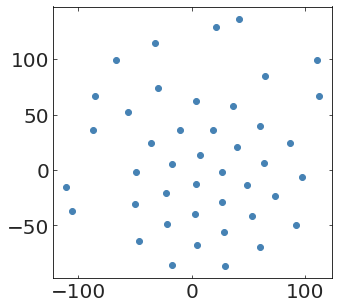

In [315]:
X_embedded = TSNE(n_components=2, random_state=345).fit_transform(X)
X_embedded.shape
plt.figure(figsize=(5,5))
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.show()

Figure 3: A 2D projection of the 80-dimensional feature space. Not sure why it looks so different from the one in the example, the density of points is much lower. Maybe because I only choose 3 metadata columns to use as features, but there still aren't even enough points to make out clusters.

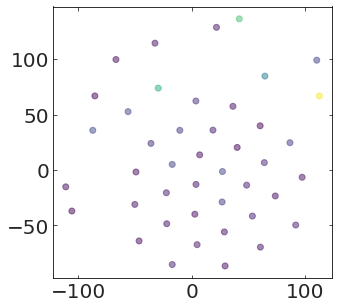

In [316]:
norm_obj = Normalize(vmin=y.min(), vmax=y.max())
len([c for c in plt.cm.RdBu_r(norm_obj(y.values))]), X_embedded.shape
plt.figure(figsize=(5,5))
plt.scatter(X_embedded[:,0], X_embedded[:,1],  
           color=[c for c in plt.cm.viridis(norm_obj(y.values))], alpha=0.5);

Figure 4: Projection from Figure 3, but each target variable is asigned a different color. 

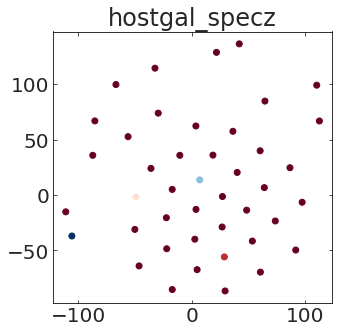

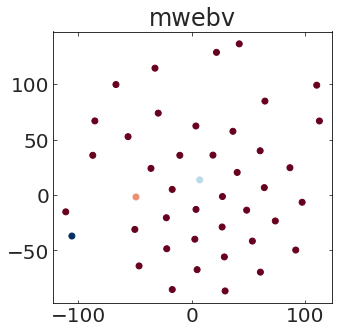

In [337]:
for col in metadata[['hostgal_specz', 'mwebv']].columns:
    v = metadata.loc[:,col].astype(float)
    plt.figure(figsize=(5,5))
    plt.title(col)
    plt.scatter(X_embedded[:,0], X_embedded[:,1],  color=[plt.cm.RdBu_r(Normalize(vmin=v.min(), vmax=v.max())(c))
                                                         for c in range(len(X))])

    plt.show()

Figure 5: Feature projection mapped onto metadata features. The only difference I can see between hostgal_specz and mwebv is one point around ~(20, -60) changed color but I don't understand enough about this representation to interpret that and I probably messed up somewhere up above anyway.